In [ ]:
%matplotlib inline

In [1]:
import tensorflow as tf
import data_provider
import emotion_model
import numpy as np
import matplotlib.pyplot as plt

from menpo.visualize import print_progress
slim = tf.contrib.slim

In [2]:
nogpu_config = tf.ConfigProto(
    # Do not use a GPU device
    device_count = {'GPU': 0}
)

sess = tf.Session(config=nogpu_config)

In [3]:
audio, ground_truth = data_provider.get_split('valid')

In [4]:
with tf.variable_scope('net'):
    with slim.arg_scope([slim.batch_norm, slim.layers.dropout],
                        is_training=False):
        prediction = emotion_model.audio_model(audio)

In [29]:
variables_to_restore = slim.get_variables_to_restore()
saver = tf.train.Saver(variables_to_restore)
model_path = slim.evaluation.tf_saver.get_checkpoint_state('ckpt/train').model_checkpoint_path
saver.restore(sess, model_path)
print(model_path)

ckpt/train/model.ckpt-901


In [6]:
_ = tf.train.start_queue_runners(sess=sess)

In [30]:
predictions = []
gts = []

for i in print_progress(range(30)):
    p, gt = sess.run([prediction, ground_truth])
    predictions.append(p)
    gts.append(gt)

[====================] 100% (30/30) - done.                                     


In [8]:
def concordance_cc(r1, r2):
    mean_cent_prod = ((r1 - r1.mean()) * (r2 - r2.mean())).mean()

    return (2 * mean_cent_prod) / (r1.var() + r2.var() + (r1.mean() - r2.mean()) ** 2)

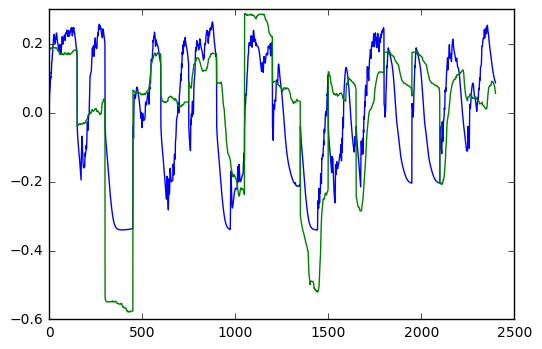

In [31]:
plt.plot(predictions[0][..., 0].ravel())
plt.plot(gts[0][..., 0].ravel())

In [32]:
concordance_cc(np.array(predictions)[..., 0].ravel(), np.array(gts)[..., 0].ravel())

0.6456638510198307